<a href="https://colab.research.google.com/github/Asuskf-Unemi/statistics/blob/main/semestre2/est_semana_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

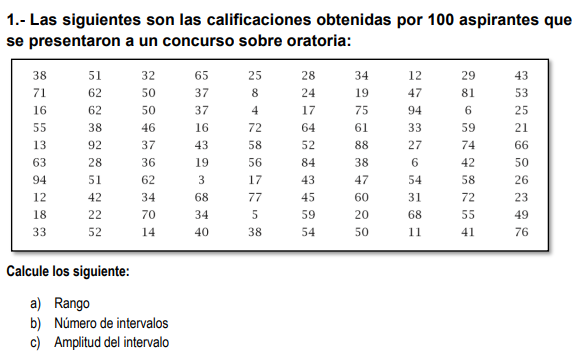

In [ ]:
aspirantes = [
    38, 71, 16, 55, 13, 63, 94, 12, 18, 33,
    51, 62, 62, 38, 92, 28, 51, 42, 22, 52,
    32, 50, 50, 46, 37, 36, 62, 34, 70, 14,
    65, 37, 37, 16, 43, 19, 3, 68, 34, 40,
    25, 8, 4, 72, 58, 56, 17, 77, 5, 38,
    28, 24, 17, 64, 52, 84, 43, 45, 59, 54,
    34, 19, 75, 61, 88, 38, 47, 60, 20, 50,
    12, 47, 94, 33, 27, 6, 54, 31, 68, 11,
    29, 81, 6, 59, 74, 42, 58, 72, 55, 41,
    43, 53, 25, 21, 66, 50, 26, 23, 49, 76
    ]

#Rango
R = [$L_s - L_i$] -> $Max - MIn$

In [ ]:
#rango
R = max(aspirantes) - min(aspirantes)

## Número de intervalos
Regla de Sturges

m = $1 + 3,322log_n$

In [ ]:
import math

In [ ]:
n = len(aspirantes)
1 + 3.322 * math.log(n, 10)

7.644

In [ ]:
m = round(1 + 3.322 * math.log(n, 10))

## Amplitud del intervalo 
C = ${R \over m}$

R: Rango

m = Número de intervalos


In [ ]:
C = R / m
C

11.375

In [ ]:
C = math.ceil(C)

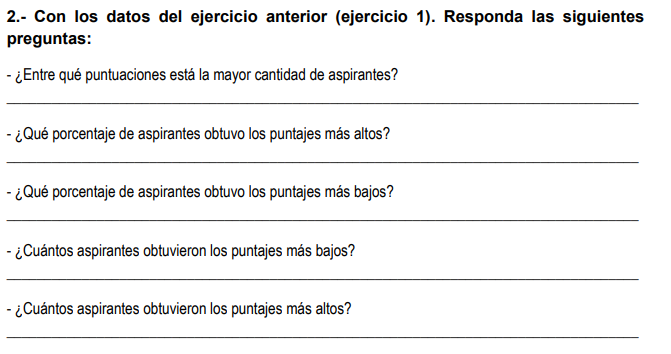

In [ ]:
def only_two_decimals(num):
  return round(num, 2)

intervals = []
fi = []
Fi = []
hi = []
Hi = []
start = min(aspirantes)
for element in range(0, m):
  end = start + C
  intervals.append(f"[{start}, {end})")
  elementsInterval = [element for element in sorted(aspirantes) if element >= start and element < end]
  numElements = len(elementsInterval)
  fi.append(numElements)
  Fi.append(sum(fi))
  hi.append(only_two_decimals(numElements/n))
  Hi.append(only_two_decimals(sum(hi)))
  start = start + C

## Crear la tabla de frecuencias

*   **$fi$** = Frecuencia Absoluta
*   **$Fi$** = Frecuencia Acumulada
*   **$hi$** = Frecuencia relativa
*   **$Hi$** = Frecuencia relativa acumulada

In [ ]:
import pandas as pd

In [ ]:
frequencyTable = pd.DataFrame({
    "intervals":intervals,
    "fi": fi,
    "Fi": Fi,
    "hi": hi,
    "Hi": Hi
    })
frequencyTable

,intervals,fi,Fi,hi,Hi
0,"[3, 15)",11,11,0.11,0.11
1,"[15, 27)",15,26,0.15,0.26
2,"[27, 39)",19,45,0.19,0.45
3,"[39, 51)",16,61,0.16,0.61
4,"[51, 63)",19,80,0.19,0.80
5,"[63, 75)",11,91,0.11,0.91
6,"[75, 87)",5,96,0.05,0.96
7,"[87, 99)",4,100,0.04,1.00


### ¿Entre qué puntuaciones está la mayor cantidad de aspirantes

In [ ]:
mode = frequencyTable['fi'].max()
mode

19

In [ ]:
frequencyTable.loc[frequencyTable['fi'] == mode]

,intervals,fi,Fi,hi,Hi
2,"[27, 39)",19,45,0.19,0.45
4,"[51, 63)",19,80,0.19,0.80


### ¿Qué porcentaje de aspirantes obtuvo los puntajes más altos?

In [ ]:
def get_more_less(df, position, columName):
  return df.iloc[position][columName]

def print_porcentaje(num):
  print(str( num * 100)+ '%')

In [ ]:
print_porcentaje(get_more_less(frequencyTable, -1, 'hi'))

4.0%


### ¿Qué porcentaje de aspirantes obtuvo los puntajes más bajos? 


In [ ]:
print_porcentaje(get_more_less(frequencyTable, 0, 'hi'))

11.0%


### ¿Cuántos aspirantes obtuvieron los puntajes más bajos? 

In [ ]:
get_more_less(frequencyTable, 0, 'fi')

11

### ¿Cuántos aspirantes obtuvieron los puntajes más altos? 


In [ ]:
get_more_less(frequencyTable, -1, 'fi')

4